In [1]:
%run "C:/Users/blake/PMT/PyPMT.ipynb"
# replace with wherever you have PyPMT.py stored

Example 1: antbounds with circleps, geoquadps, and scarlabel

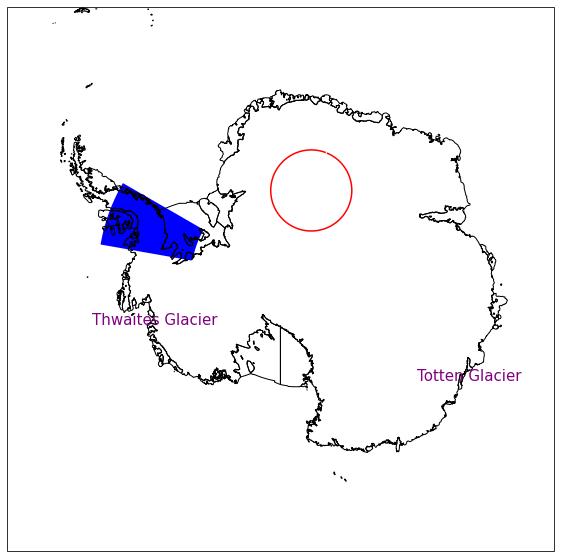

In [2]:
# Create the map and axes using antbounds function
ax = antbounds()

# Draw the center circle
#circleps(ax, lons=20, lats=-80, radii=500, km = True, edgecolor='r', fill = False, alpha=0.9)
circleps(ax, lons = 20, lats = -80, radii = 500, km=True, color='r')

# label Totten Glacier and Thwaites
scarlabel(ax, ['Totten Glacier', 'Thwaites Glacier'], color = 'purple', fontsize = 15)

# Draw a shape w/ geoquadps
latlim = [-80, -70]
lonlim = [-80, -60]
geoquadps(ax, latlim, lonlim, color='b', linewidth=2)

# Show the plot
plt.show()

Example 2: antbounds with scatterps (used to take in a list or a single point)

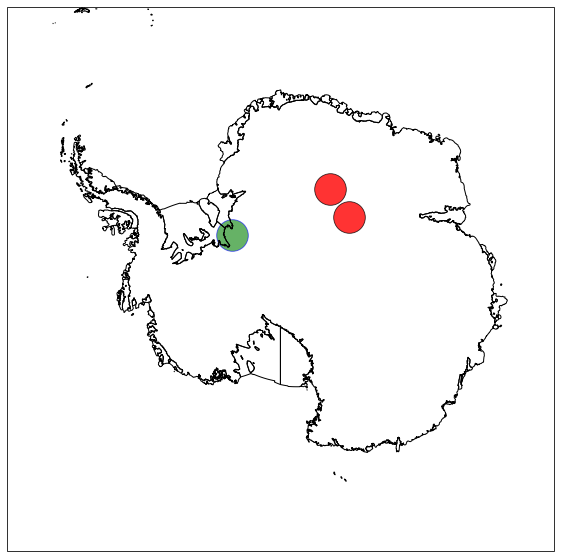

In [4]:
# Generate some random data
lat = [-80, -79]
lon = [50, 30]

# Create the map
ax = antbounds()

# Plot the points on the map
scatterps(ax, lat, lon, s=1000, c='r', alpha=0.8, edgecolors='k', linewidths=0.8)
scatterps(ax, -83, -50, s=1000, c='g', alpha = 0.6, edgecolors = 'b', linewidths = 0.9)
plt.show()

Some tests over bedmachine plots

In [5]:
# import BedMachine Greenland: https://sites.ps.uci.edu/morlighem/dataproducts/bedmachine-greenland/

nc = netCDF4.Dataset('C:/Users/blake/OneDrive/Desktop/BedMachineAntarctica-v3.nc')

x = nc.variables['x'][:]
y = nc.variables['y'][:]
bed = nc.variables['bed'][:]
surface = nc.variables['surface'][:]
thick = nc.variables['thickness'][:]
mask = nc.variables['mask'][:]

# reshape
bed2d = bed.reshape(13333, 13333)
surf2d = surface.reshape(13333, 13333)
thick2d = thick.reshape(13333, 13333)
mask2d = mask.reshape(13333, 13333)

# crop surface where ice thickness is 0
surf2d=surf2d.astype('float')
surf2d[thick2d <= 0] = np.NAN

Using textps on top of bedmachine data

Text(0.5, 1.0, 'textps testing')

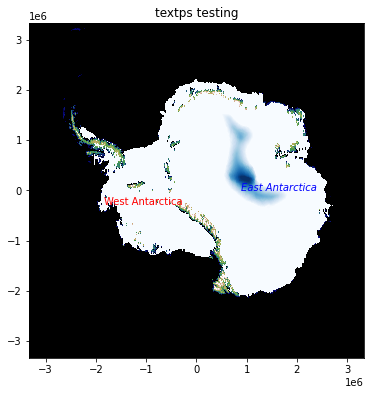

In [6]:
fig = plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -100, vmax = 2000, cmap="gist_earth")
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 3500, vmax = 4000, cmap="Blues")
textps(-80, -105, 'West Antarctica', color = 'red') #testing textps
textps(-75, 90, 'East Antarctica', fontstyle='italic', color='blue')
plt.title('textps testing')

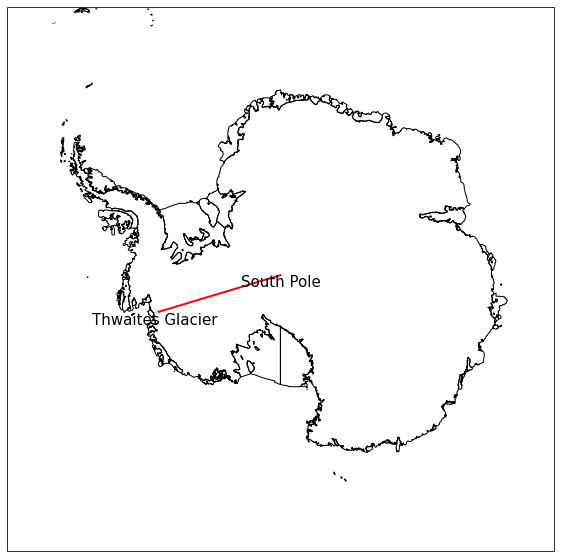

In [2]:
[mcmlat, mcmlon] = scarloc('thwaites glacier')
ax = antbounds()
scarlabel(ax, 'South Pole', fontsize = 15)
scarlabel(ax, 'Thwaites Glacier', fontsize = 15)
plotps(ax, [-90, mcmlat], [0, mcmlon], color = 'red', linewidth = 2)
plt.show()